# The Lorenz Attractor

The dynamics of the Lorenz system is governed by the following differential equations:

$$ \frac{\mathrm{d}x}{\mathrm{d}t} = \sigma ( y - x) $$

$$ \frac{\mathrm{d}y}{\mathrm{d}t} = x ( \rho - z) - y $$

$$ \frac{\mathrm{d}z}{\mathrm{d}t} = x y  - \beta z $$

These equations were derived for a simple model of convection, but arise in a number of models for different physical systems.   
It is notable for having chaotic solutions for certain parameters and initial conditions.

In this notebook, we will first examine the trajectory $(x (t), y (t), z(t))$ for fixed values of the parameters  $\rho, \sigma, \beta$, and then consider how the dynamics is affected by changing these values.

In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import odeint                 # for solving ODEs
from mpl_toolkits.mplot3d import Axes3D            # for 3D plots


## Fixed parameters
Let's consider the standard parameter values used to illustrate the Lorenz Attractor
 $$\rho = 28, \sigma = 10, \beta = \frac{8}{3}$$

In [2]:
frho = 28.0 # f just means fixed values 
fsigma = 10.0
fbeta = 8.0/3.0

To solve the differential equation, we will use the odeint routine in scipy.   

From the documention for this routine, it is called as:

    scipy.integrate.odeint(func, y0, t, args=(), ....)
        
where
func:     is a callable function which computes the first derivative (for each coupled equation).    
y0 :      is the initial condition of the variable  (which is a vector like (x0, y0, z0)  in our case).   
t:        is an array of the time points at which to calculate solutions   
args:     are additional variables (other than x, y, z) needed in the function evaluation. i.e. $\rho, \sigma, \beta$

So the first thing to do is make a function which returns the first derivatives
    

In [3]:
# function to return the first derivatives
# note that 'state' contains the x, y, z values

def f1(state, t, rho, sigma, beta):  
    x, y, z = state                                                # unpack the state vector
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z    # dx/dt, dy/dt, dz/dt

Now let's use odeint to calculate the trajectory for 1000 timesteps in $0<t<50$, for initial conditions $(x_0, y_0, z_0) = (1, 1, 1)$


In [4]:
state0 = np.array([1.0, 1.0, 1.0])
timesteps =5000
t = np.linspace(0.0, 50.0, timesteps)
states = odeint(f1, state0, t, args=(frho, fsigma, fbeta))

What's the output of odeint into the states variable?

In [5]:
print(states.shape)
# each row is a time step and each column is the x,y,z value 

(5000, 3)


An array of size    (time steps) x (size of state0).   
So, e.g. the column

    states[:, 0]
is the x-coordinate at all time steps.

Let's plot this...


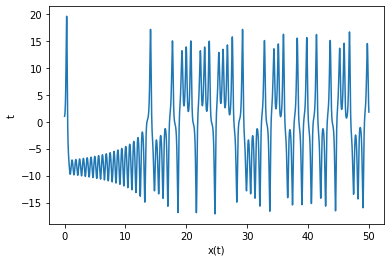

In [6]:
# plot of x vs t
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(t, states[:,0])
ax.set_xlabel('x(t)')
ax.set_ylabel('t')

plt.show()

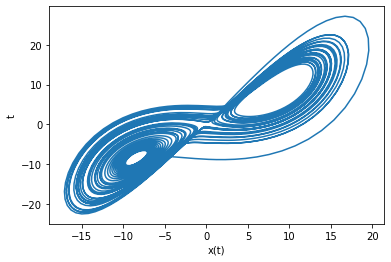

In [7]:
# or y vs x

fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(states[:,0], states[:,1])
ax.set_xlabel('x(t)')
ax.set_ylabel('t')

plt.show()

To properly view the trajectories, let's plot them in 3D

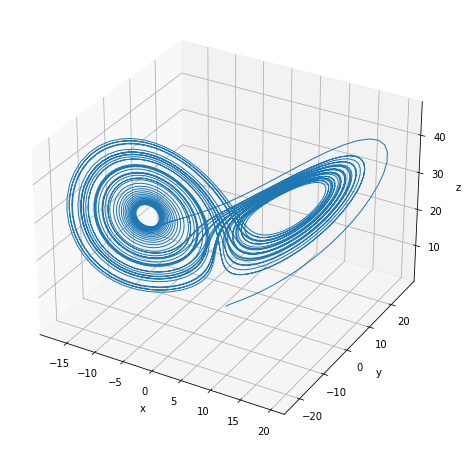

In [8]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.plot(states[:,0], states[:,1], states[:,2], linewidth=1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

Let's compare this to the trajectory from a _very slightly_ different starting point

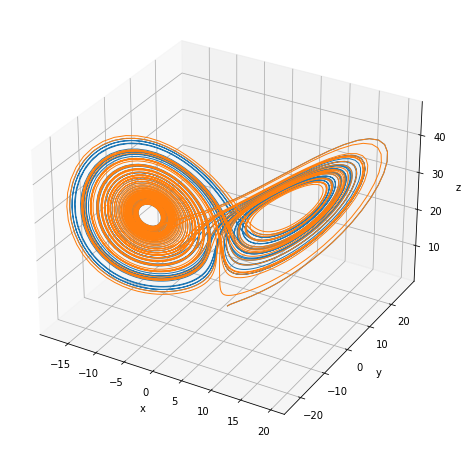

In [9]:
state0b = np.array([1.001, 1.0, 1.0])  # new dlightly different inital state of the system
statesb = odeint(f1, state0b, t, args=(frho, fsigma, fbeta))

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.plot(states[:,0], states[:,1], states[:,2], linewidth=1) # first state 
ax.plot(statesb[:,0], statesb[:,1], statesb[:,2], linewidth=1) # the new slightly different state 
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()


It is clear the trajectories diverge after some time.   
Let's plot the distance between the two paths at each time step. 

To do this, we use the np.linalg.norm() method on the array  _statesb - states_.  
Note that we restrict the norm to axis=1 (i.e. x,y,z) to return the distance at each time step (axis=0)

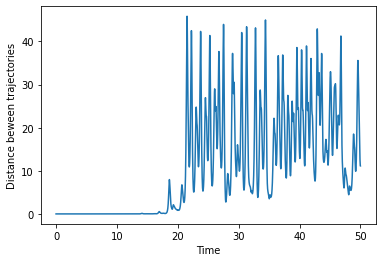

In [10]:
distance = np.linalg.norm(statesb - states, axis=1) # calculating the distance between the two paths generated
                                                    # by the 2 inital states , for each time step t 
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(t, distance)
ax.set_xlabel('Time')
ax.set_ylabel('Distance beween trajectories')
plt.show()

### Exercise:
Create an animation showing the evolution of two nearby trajectories as a function of time.

<br>

## Varying parameters


Now let's look at the different trajectories that emerge when the parameters $\rho, \sigma, \beta$ are allowed to vary.

Consider a range of $N_\rho$ different $\rho$ values.  
We want to calculate the trajectory for each, but avoid a for loop.

In [11]:
rho_range = np.array([5, 15, 25, 50, 100, 125, 150, 200])

Instead, extend the _state_ array to include $(x, y, z)$ for each value of $\rho$.    
Then solve $3  N_\rho$ differential equations simultaneously with one call to _odeint_.

Our initial state would then have dimensions $N_\rho$ x 3.  
The desired output state array would then be $N_\rho$ x timesteps x 3.

Note that odeint requires a vector for y0, and will output a 2D array at most.  
We will have to flatten one of the dimensions to get the correct shape for each. 

In [12]:
state0 =  np.array([1, 2, 3])
state0c = (state0[:, np.newaxis] * np.ones_like(rho_range)).flatten()
print(state0c)
print(np.array([[1,2], [2,1], [3,1]]).flatten())

[1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3]
[1 2 2 1 3 1]


state0c is now a 1D array with ordering: $x_0, x_0, x_0 ...... y_0, y_0, y_0, ......, z_0, z_0, z_0$.

We need to build a new version of the function that can deal with this, and multiple values of rho

In [13]:
def f2(state, t, rho_range, sigma, beta):
    
    # split the input state vector into 3 vectors for x, y, z.
    x,y,z = state.reshape(3, rho_range.size)    # unflattens  state0c 
    #print(x)
    #these evaluations can be done as vectors, as x[i], y[i], z[i] all refer to rho_range[i]
    dx, dy, dz = sigma * (y - x), x * (rho_range - z) - y, x * y - beta * z  # derivatives
    #print (dx.shape)
    #need to flatten the output vector
    return np.array([dx, dy, dz]).flatten()

In [14]:

# calculate the trajectories for all values of rho simultaneously
statec = odeint(f2, state0c, t, args=(rho_range, fsigma, fbeta))

In [15]:
# what shape is the output?
print(statec.shape)

(5000, 24)


The data is in the shape (timesteps, rho_range x 3).   
Let's reshape this into something easier to manage.

In [16]:
statec = statec.reshape( (timesteps,  3, len(rho_range)) ).T

In [17]:
statec.shape # Now (rho_values , xyz,timestep)

(8, 3, 5000)

The data can now be accessed as statec [rho_value , x/y/z, timestep].

Let's plot all the trajectories together.   
It can be useful to ignore the first 500 or so points on the trajectory.   
(why? consider the dashed segments below)

(note the different panels below have different scales)

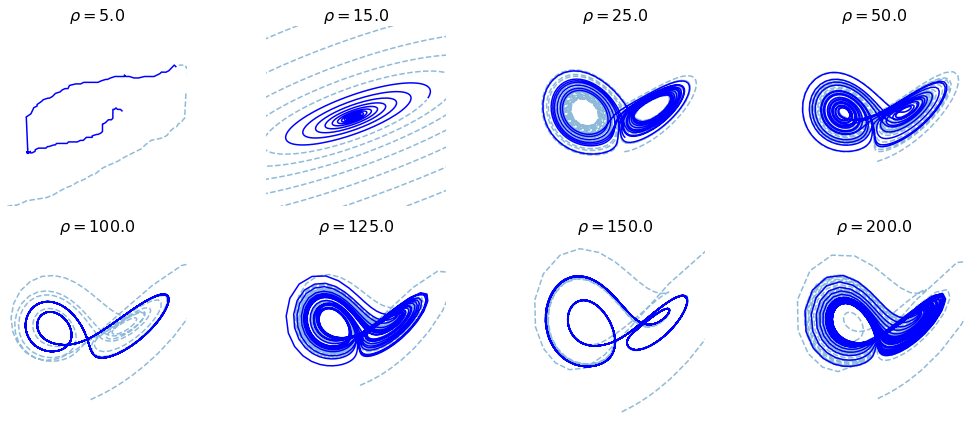

In [18]:
fig=plt.figure(figsize=(15, 6))

starting_point= 3500

for i, rho in enumerate(rho_range):
    ax = fig.add_subplot(2, 4, i+1, projection='3d')
    ax.axis('off')
    ax.grid(False)
    ax.set_title( r'$\rho = %.1lf $' % (rho_range[i]) , fontsize=16)
    ax.plot( statec[i,0,:starting_point], statec[i,1,:starting_point], statec[i,2,:starting_point], '--', alpha=0.5 )
    ax.plot( statec[i,0, starting_point:], statec[i,1,starting_point:], statec[i,2,starting_point:], c='b' )
    
    ax.set_xlim( statec[i,0, starting_point:].min(), statec[i,0, starting_point:].max())
    ax.set_ylim( statec[i,1, starting_point:].min(), statec[i,1, starting_point:].max())
    ax.set_zlim( statec[i,2, starting_point:].min(), statec[i,2, starting_point:].max())

    
    
plt.tight_layout()
plt.show()    

Very different behaviour is seen for different values of $\rho$.  
At low $\rho$, the trajectory is attracted to individual points.  
Some values show convergence to periodic trajectories or _limit cycles_ ($\rho=100, 150$).   
At other values, $\rho=25, 50, 125, 200$, aperiodic, chaotic behaviour emerges.  

We would like to plot how the behaviour evolves as we vary $\rho$.   
This can be done with a bifurcation diagram, which shows the points visited or approached asympoptotically.

Let's look at the $z$ component of the above trajectories for large $t$.


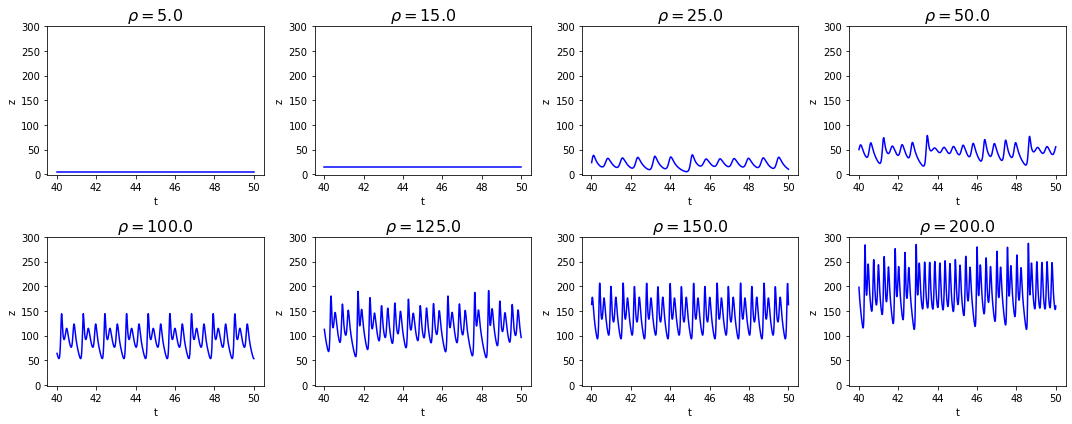

In [19]:
fig=plt.figure(figsize=(15, 6))

starting_point=4000

for i, rho in enumerate(rho_range):
    ax = fig.add_subplot(2, 4, i+1,)
    ax.set_title( r'$\rho = %.1lf $' % (rho_range[i]) , fontsize=16)
    ax.plot( t[starting_point:], statec[i,2,starting_point:], c='b' )
    
    ax.set_xlabel('t')
    ax.set_ylabel('z')

    ax.set_ylim(-2, 300)
    
plt.tight_layout()
plt.show()    

We can see the different periodicities more clearly here.  
To plot the behaviour as a function of $\rho$, we can extract the local maxima from these curves.

This can be extracted easily from numerical sets using the from argrelextrema tool in scipy.


In [20]:
from scipy.signal import argrelextrema

We need to specify the set, the comparison to perform (e.g. greater or less than), and an order.
(The order is how many points to either side to consider when determining if a point is a local extremum).  
For example, for the $\rho=25$ curve, the indices corresponding to local maxima in $z$ are given by

In [21]:
zmax = argrelextrema(statec[2,2,:], np.greater, order=2) [0]

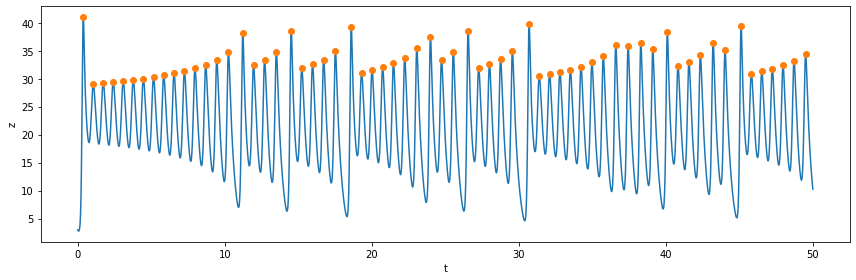

In [22]:
fig=plt.figure(figsize=(12, 4))

ax = fig.add_subplot(111)
ax.plot( t[:], statec[2,2,:] )

ax.plot( t[zmax], statec[2,2,zmax], 'o' )

ax.set_xlabel('t')
ax.set_ylabel('z')

plt.tight_layout()
plt.show()    

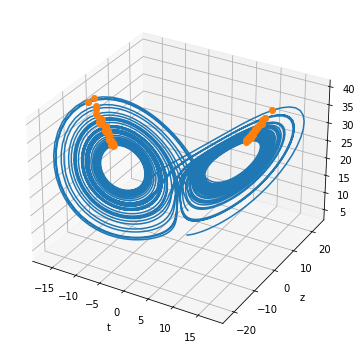

In [23]:
fig=plt.figure(figsize=(5, 5))

ax = fig.add_subplot(111, projection='3d')
#ax.plot( t[:], statec[2,2,:] )
ax.plot( statec[2,0, :], statec[2,1,:], statec[2,2,:], )

ax.plot( statec[2,0,zmax], statec[2,1,zmax], statec[2,2,zmax], 'o' )


ax.set_xlabel('t')
ax.set_ylabel('z')

plt.tight_layout()
plt.show()    

Now let's plot the maximums found for each of the $\rho$ values considered

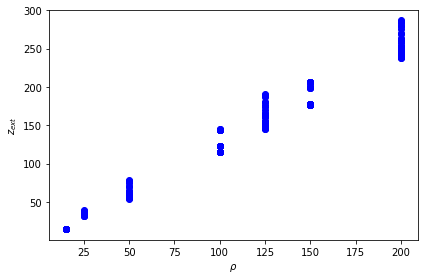

In [24]:
fig=plt.figure()
ax=fig.add_subplot(111)
starting_point=4000

for i, rho in enumerate(rho_range):
    
    zmax = argrelextrema(statec[i,2,starting_point:], np.greater, order=2) [0]

    ax.plot( rho * np.ones_like(zmax) , statec[i,2,starting_point:][zmax], 'o', c='b' )
    
    ax.set_xlabel(r'$\rho$')
    ax.set_ylabel(r'$z_{ext}$')

    
plt.tight_layout()
plt.show()    

Finally, let's consider this for a wider range of $\rho$ values, and map minima and maxima for each.   
The cell below may take a minute or two to run

In [25]:
state0 = np.array([1.0, 1.0, 1.0])
timesteps =5000
t = np.linspace(0.0, 50.0, timesteps)
rho_range = np.linspace(0.0, 350, 701)
state0c = (state0[:, np.newaxis] * np.ones_like(rho_range)).flatten()
statec = odeint(f2, state0c, t, args=(rho_range, fsigma, fbeta))
statec = statec.reshape( (timesteps,  3, len(rho_range)) ).T

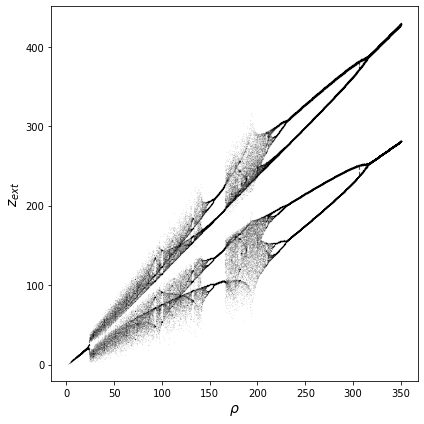

In [26]:
fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(111)
starting_point=2000

for i, rho in enumerate(rho_range):
    
    zmax = argrelextrema(statec[i,2,starting_point:], np.greater, order=2) [0]
    ax.plot( rho * np.ones_like(zmax) , statec[i,2,starting_point:][zmax], 'ko', markersize=0.05, alpha=0.5)
    zmin = argrelextrema(statec[i,2,starting_point:], np.less, order=2) [0]
    ax.plot( rho * np.ones_like(zmin) , statec[i,2,starting_point:][zmin], 'ko', markersize=0.05, alpha=0.5)
    
    ax.set_xlabel(r'$\rho$', fontsize=14)
    ax.set_ylabel(r'$z_{ext}$', fontsize=14)

    
plt.tight_layout()
plt.show()    

Can also run in more detail for interesting regions

In [27]:
state0 = np.array([1.0, 1.0, 1.0])
timesteps =5000
t = np.linspace(0.0, 50.0, timesteps)
rho_range = np.linspace(145, 165, 501)
state0c = (state0[:, np.newaxis] * np.ones_like(rho_range)).flatten()
statec = odeint(f2, state0c, t, args=(rho_range, fsigma, fbeta))
statec = statec.reshape( (timesteps,  3, len(rho_range)) ).T

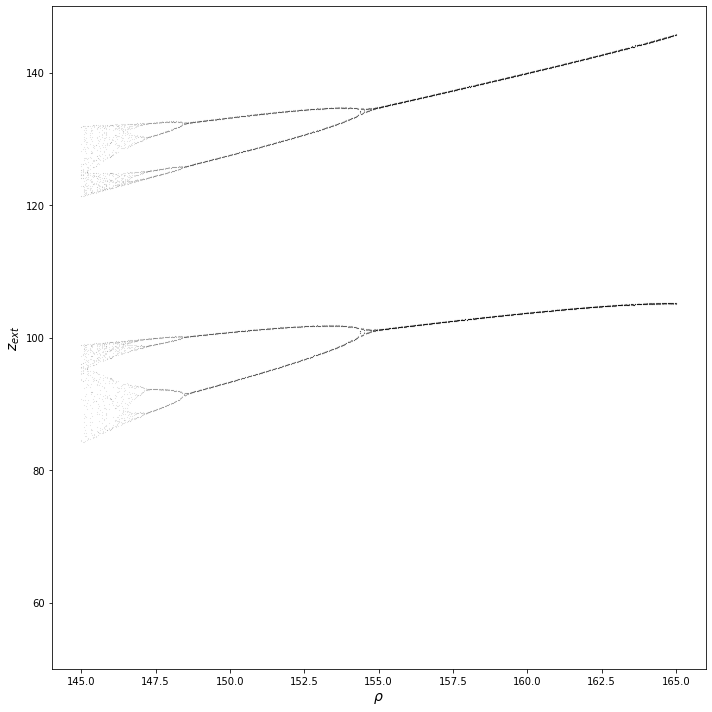

In [28]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
starting_point=4000

for i, rho in enumerate(rho_range):
    
    zmax = argrelextrema(statec[i,2,starting_point:], np.greater, order=2) [0]
    ax.plot( rho * np.ones_like(zmax) , statec[i,2,starting_point:][zmax], 'ko', markersize=0.04, alpha=0.9)
    zmin = argrelextrema(statec[i,2,starting_point:], np.less, order=2) [0]
    ax.plot( rho * np.ones_like(zmin) , statec[i,2,starting_point:][zmin], 'ko', markersize=0.04, alpha=0.9)
    
    ax.set_xlabel(r'$\rho$', fontsize=14)
    ax.set_ylabel(r'$z_{ext}$', fontsize=14)
    ax.set_ylim(50,150)
    
plt.tight_layout()
plt.show()    